In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
url2 = 'https://raw.githubusercontent.com/katieaebi/StatComp_final/main/ufo-sightings-transformed.csv'
ufo_df = pd.read_csv(url2)

In [ ]:
ufo_df.head()

,Unnamed: 0,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,0,1949-10-10 20:30:00,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,2,1955-10-10 17:00:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,3,1956-10-10 21:00:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,4,1960-10-10 20:00:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


In [ ]:
len(ufo_df)

80328

Chance model:
Does summer have statistically longer UFO encounters than other seasons?

Null: length of encounters in summer <= length of encounters in other seasons,
Alternative: length of encounters in summer > length of encounters in other seasons

Test stat: summer-other seasons

Positive values support the alternative, and negative values support the null

Significance level: a = .01

In [ ]:
summer_mean_seconds = ufo_df[ufo_df['Season']=='Summer']['length_of_encounter_seconds'].mean()
summer_std_seconds = ufo_df[ufo_df['Season']=='Summer']['length_of_encounter_seconds'].std()
all_mean_seconds = ufo_df['length_of_encounter_seconds'].mean()
all_std_seconds =  ufo_df['length_of_encounter_seconds'].std()

print(summer_mean_seconds)
print(all_mean_seconds)
print(all_std_seconds)

11636.46930930931
9017.335648354247
620232.22916874


In [ ]:
from scipy.stats import norm as norm

In [ ]:
#generate 10,000 random variables
rand_var_all = norm.rvs(loc=all_mean_seconds, scale=all_std_seconds, size=10000)
rand_var_summer = norm.rvs(loc=summer_mean_seconds, scale=summer_std_seconds, size=10000)

In [ ]:
test_stats = []
for i, value in enumerate(rand_var_all):
  stat = rand_var_summer[i] - value
  if stat<=value:
    test_stats.append(stat)
test_stats = np.array(test_stats)

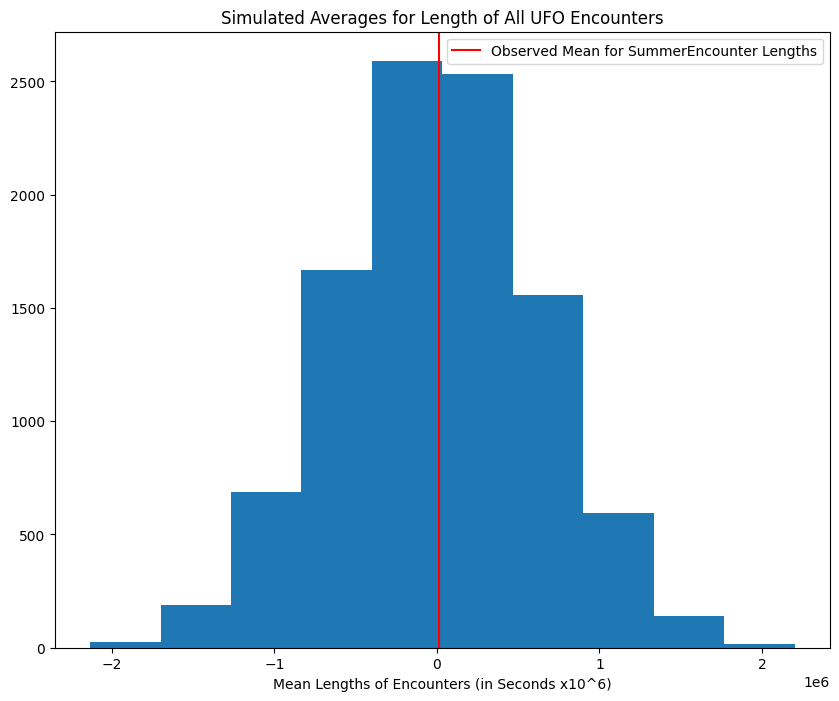

In [ ]:
plt.figure(figsize = (10,8))
plt.hist(rand_var_all)
plt.axvline(summer_mean_seconds, c='r', label='Observed Mean for SummerEncounter Lengths')
plt.title('Simulated Averages for Length of All UFO Encounters')
plt.xlabel('Mean Lengths of Encounters (in Seconds x10^6)')
plt.legend()

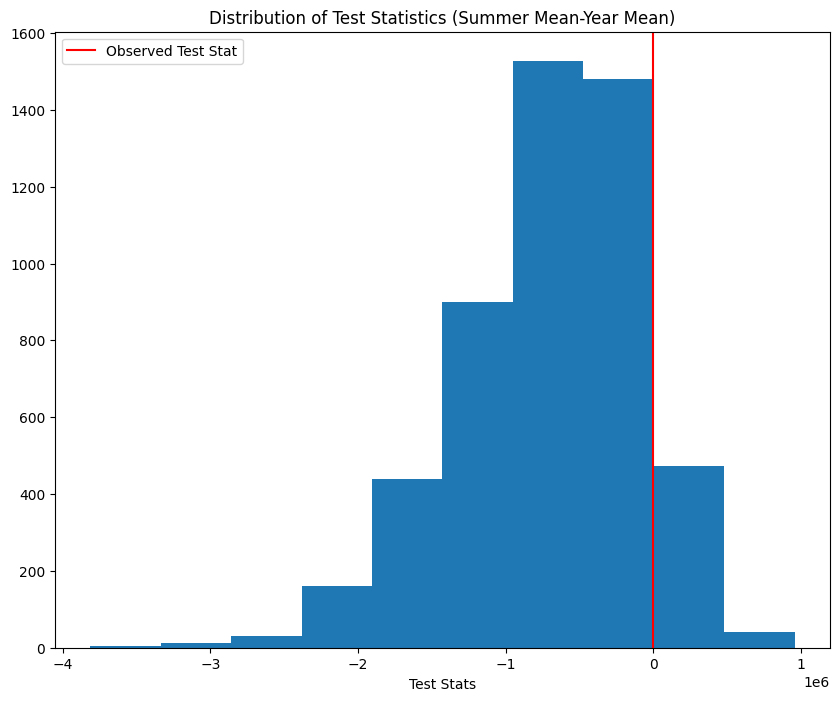

In [ ]:
plt.figure(figsize = (10,8))
plt.hist(test_stats)
plt.axvline(summer_mean_seconds-all_mean_seconds, c='r', label = 'Observed Test Stat')
plt.xlabel('Test Stats')
plt.title('Distribution of Test Statistics (Summer Mean-Year Mean)')
plt.legend()

In [ ]:
p_null = len(rand_var_all[summer_mean_seconds <= rand_var_all])/len(rand_var_all)
p_val = len(rand_var_all[rand_var_all >= abs(summer_mean_seconds-p_null)])/len(rand_var_all)
print(p_val)

0.5008


In [ ]:
#Fail to reject the null. There was *wildly* not convincing evidence that ufo encounters in the summer occur for longer than encounters in other seasons.

Permutation test:

Is the distribution of UFO shapes significantly different in Florida than in Texas?

Null: Florida shapes = Texas shapes,
Alternative: Florida shapes != Texas shapes

Test stat: total variation distance

Large values support alternative, small values support the null

Significance level: a=.05

In [ ]:
shape_names = np.array(ufo_df['UFO_shape'].unique())
shape_names

array(['Cylinder', 'Light', 'Circle', 'Sphere', 'Disk', 'Fireball',
       'Unknown', 'Oval', 'Other', 'Cigar', 'Rectangle', 'Chevron',
       'Triangle', 'Formation', nan, 'Delta', 'Changing', 'Egg',
       'Diamond', 'Flash', 'Teardrop', 'Cone', 'Cross', 'Pyramid',
       'Round', 'Crescent', 'Flare', 'Hexagon', 'Dome', 'Changed'],
      dtype=object)

In [ ]:
obs_shapes_florida = np.zeros(len(ufo_df['UFO_shape'].unique()))
obs_shapes_texas = np.zeros(len(ufo_df['UFO_shape'].unique()))

for i, shape in enumerate(ufo_df['UFO_shape'].unique()):
  florida_count = len(ufo_df[ufo_df['Region'] == 'Florida'][ufo_df['UFO_shape'] == shape])
  texas_count = len(ufo_df[ufo_df['Region'] == 'Texas'][ufo_df['UFO_shape'] == shape])
  obs_shapes_florida[i] = florida_count
  obs_shapes_texas[i] = texas_count

<ipython-input-13-386d39591df0>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_count = len(ufo_df[ufo_df['Region'] == 'Florida'][ufo_df['UFO_shape'] == shape])
<ipython-input-13-386d39591df0>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  texas_count = len(ufo_df[ufo_df['Region'] == 'Texas'][ufo_df['UFO_shape'] == shape])


In [ ]:
def get_tvd(dist_one, dist_two):
  return sum(np.abs(dist_one-dist_two))/2

In [ ]:
obs_tvd = get_tvd(obs_shapes_florida, obs_shapes_texas)
obs_tvd

296.0

In [ ]:
FT_shapes_array = np.array(ufo_df[ufo_df['Region'] == 'Florida']['UFO_shape'].append(ufo_df[ufo_df['Region'] == 'Texas']['UFO_shape']))
FT_names_array = np.array(ufo_df[ufo_df['Region'] == 'Florida']['Region'].append(ufo_df[ufo_df['Region'] == 'Texas']['Region']))

print(FT_shapes_array)
print(FT_names_array)

['Disk' 'Formation' 'Triangle' ... 'Light' 'Formation' 'Cigar']
['Florida' 'Florida' 'Florida' ... 'Texas' 'Texas' 'Texas']


<ipython-input-16-8540832a4edd>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FT_shapes_array = np.array(ufo_df[ufo_df['Region'] == 'Florida']['UFO_shape'].append(ufo_df[ufo_df['Region'] == 'Texas']['UFO_shape']))
<ipython-input-16-8540832a4edd>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FT_names_array = np.array(ufo_df[ufo_df['Region'] == 'Florida']['Region'].append(ufo_df[ufo_df['Region'] == 'Texas']['Region']))


In [ ]:
def rand_states():
  np.random.shuffle(FT_names_array)
  return FT_names_array

In [ ]:
rand_states()

array(['Florida', 'Florida', 'Florida', ..., 'Florida', 'Texas', 'Texas'],
      dtype=object)

In [ ]:
def create_simulated_test_stat():
  sim_shapes_florida = np.zeros(len(ufo_df['UFO_shape'].unique()))
  sim_shapes_texas = np.zeros(len(ufo_df['UFO_shape'].unique()))

  sim_states = rand_states()

  for i, shape in enumerate(ufo_df['UFO_shape'].unique()):
    fake_florida = FT_shapes_array[sim_states == 'Florida']
    florida_count = len(fake_florida[fake_florida == shape])
    fake_texas = FT_shapes_array[sim_states == 'Texas']
    texas_count = len(fake_texas[fake_texas == shape])
    sim_shapes_florida[i] = florida_count
    sim_shapes_texas[i] = texas_count

  fake_test_stat = get_tvd(sim_shapes_florida, sim_shapes_texas)
  return fake_test_stat

In [ ]:
create_simulated_test_stat()

245.0

In [ ]:
sim_tvds = np.zeros(10000)

for i in range(10000):
  tvd = create_simulated_test_stat()
  sim_tvds[i] = tvd

In [ ]:
sig_level = np.percentile(sim_tvds, 95)

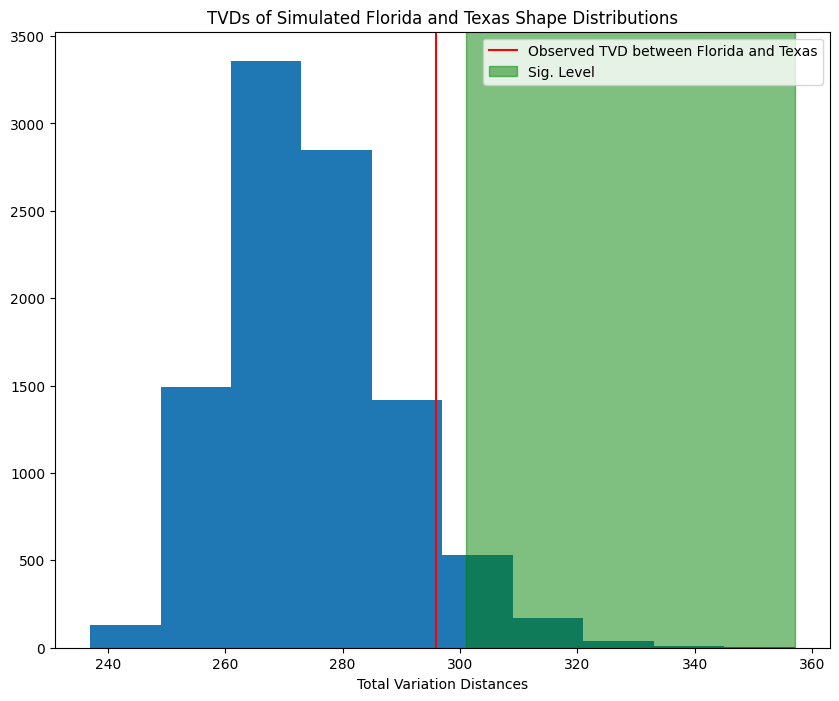

In [ ]:
plt.figure(figsize = (10,8))
plt.hist(sim_tvds)
plt.axvline(obs_tvd, c='r', label='Observed TVD between Florida and Texas')
plt.axvspan(ymax = 4000, ymin=0, xmin=sig_level, xmax=sim_tvds.max(), alpha=.5, color='green', label='Sig. Level' )
plt.xlabel("Total Variation Distances")
plt.title("TVDs of Simulated Florida and Texas Shape Distributions")
plt.legend()

In [ ]:
#Fail to reject the null. There is not convincing evidence that the distribution of UFO shapes differs significantly from Florida to Texas.

Bootstrapping:   

Most encounters in the dataset occur during dark hours of the day. How would the mean hour of sightings change in a location like Alaska where daylight patterns work differently?

What is the mean hour of encounter in Alaska and how does it compare to the global average?

Null: Alaska's mean hour of encounter = global mean hour,
Alternative: Alaska's mean hour != global mean hour

Test Stat: mean

If the global average falls within the confidence interval for the Alaskan average, then that means that they are similar, supporting the null hypothesis; otherwise, they are dissimilar, supporting the alternative.

Significance level: a=.05

In [ ]:
ufo_df[ufo_df['Region']=='Alaska']['Season'].value_counts()

Winter    111
Autumn    107
Spring     77
Summer     58
Name: Season, dtype: int64

In [ ]:
obs_alaska = ufo_df[ufo_df['Region']=='Alaska']['Hour'].mean()
obs_global = ufo_df['Hour'].mean()

In [ ]:
def one_bootstrapped_mean():
  alaska_only = ufo_df[ufo_df['Region']=='Alaska']
  mimic_alaska = alaska_only.sample(n=len(alaska_only), replace=True)
  return np.average(mimic_alaska['Hour'])

In [ ]:
one_bootstrapped_mean()

14.385269121813032

In [ ]:
numsim = 10000
boots = np.zeros(numsim)

for i in range(numsim):
  boots[i] = one_bootstrapped_mean()

In [ ]:
boots

array([13.92351275, 15.18413598, 14.22379603, ..., 13.84419263,
       14.54957507, 13.9121813 ])

In [ ]:
left_endpoint = np.percentile(boots, 2.5)
right_endpoint = np.percentile(boots, 97.5)

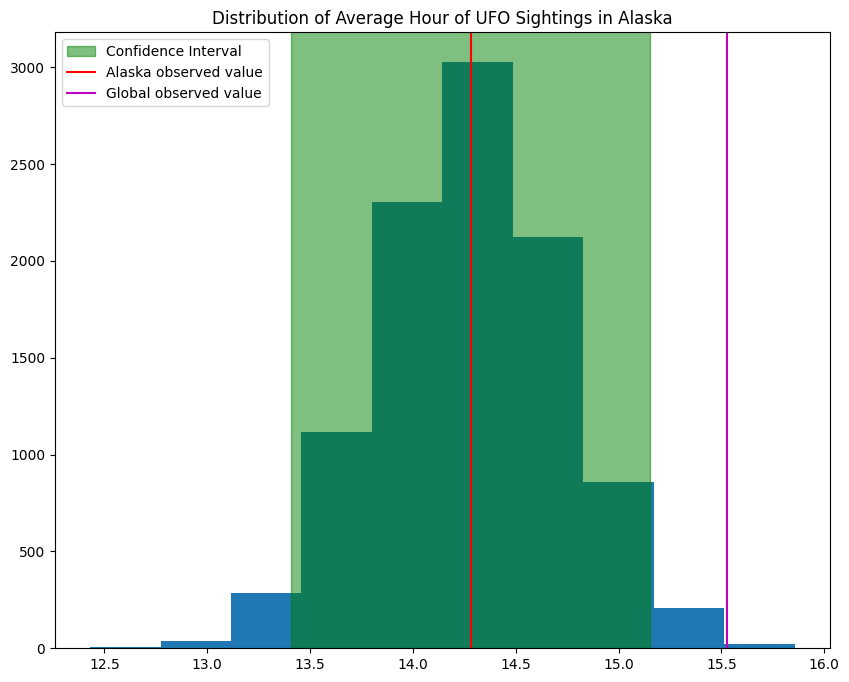

In [ ]:
plt.figure(figsize = (10,8))
plt.hist(boots)
plt.axvspan(ymax = boots.max(), ymin = 0, xmax = right_endpoint, xmin = left_endpoint, alpha=0.5, color='green', label='Confidence Interval')
plt.axvline(obs_alaska, c='r', label = 'Alaska observed value')
plt.axvline(obs_global, c='m', label = 'Global observed value')
plt.title('Distribution of Average Hour of UFO Sightings in Alaska')
plt.legend()

In [ ]:
#reject the null hypothesis. There is convincing evidence to suggest that the mean hour of UFO sightings in Alaska is statistically lower
#than the global mean hour of UFO sightings.